In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score

In [3]:
xtr=pd.read_csv('/content/drive/MyDrive/ML/mnist/train_X.csv')
ytr=pd.read_csv('/content/drive/MyDrive/ML/mnist/train_label.csv')
xt=pd.read_csv('/content/drive/MyDrive/ML/mnist/test_X.csv')
yt=pd.read_csv('/content/drive/MyDrive/ML/mnist/test_label.csv')
xtr=np.array(xtr).T
ytr=np.array(ytr).T
xt=np.array(xt).T
yt=np.array(yt).T

In [4]:
print(xtr.shape)
print(ytr.shape)
print(xt.shape)
print(yt.shape)

(784, 999)
(10, 999)
(784, 349)
(10, 349)


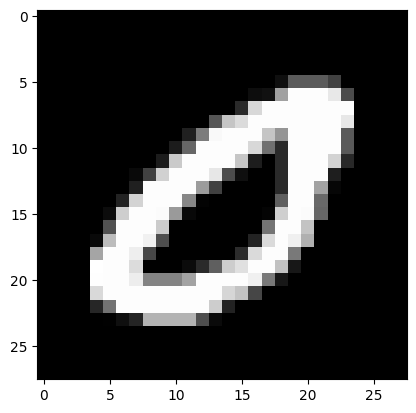

In [5]:
plt.imshow(xtr[:,0].reshape((28,28)),cmap='grey')
plt.show()

In [6]:
def relu(x):
  return np.maximum(x,0)
def drelu(x):
  return (x>0).astype(int)
def softmax(x):
  exp=np.exp(x-np.max(x,axis=0,keepdims=True))
  return exp/np.sum(exp,axis=0,keepdims=True)

In [7]:
def init(n):
  w=[]
  b=[]
  for i in range(len(n)-1):
    w.append(np.random.randn(n[i+1],n[i])*0.01)
    b.append(np.zeros((n[i+1],1)))
  return w,b

In [8]:
def forward(x,w,b):
  z=[]
  a=[]
  a.append(x)
  for i in range(len(w)-1):
    z.append(np.dot(w[i],a[-1])+b[i])
    a.append(relu(z[-1]))
  z.append(np.dot(w[-1],a[-1])+b[-1])
  a.append(softmax(z[-1]))
  return z,a

In [9]:
def cost(a,y):
  m=y.shape[1]
  return -(1/m)*np.sum(y*np.log(a))

In [10]:
def backward(x,y,w,b,z,a):
  dz=[]
  dw=[]
  db=[]
  m=y.shape[1]
  dz.append(a[-1]-y)
  dw.append((1/m)*np.dot(dz[-1],a[-2].T))
  db.append((1/m)*np.sum(dz[-1],axis=1,keepdims=True))
  for i in range(len(w)-1):
    dz.append(np.dot(w[-1-i].T,dz[-1])*drelu(a[-2-i]))
    dw.append((1/m)*np.dot(dz[-1],a[-3-i].T))
    db.append((1/m)*np.sum(dz[-1],axis=1,keepdims=True))
  return dw,db

In [11]:
def update(w,b,dw,db,lr):
  for i in range(len(w)):
    w[i]-=lr*dw[-1-i]
    b[i]-=lr*db[-1-i]
  return w,b

In [12]:
def model(x,y,lr,it,bs,n):
  cl=[]
  w,b=init(n)
  for i in range(it):
    for j in range(int(x.shape[1]/bs)):
      id=random.sample(range(0,x.shape[1]),bs)
      z,a=forward(x[:,id],w,b)
      cl.append(cost(a[-1],y[:,id]))
      dw,db=backward(x[:,id],y[:,id],w,b,z,a)
      w,b=update(w,b,dw,db,lr)
  plt.plot(np.arange(it*(int(x.shape[1]/bs))),cl)
  plt.show()
  return w,b

In [13]:
def predict(x,w,b):
  z,a=forward(x,w,b)
  return np.argmax(a[-1],axis=0)

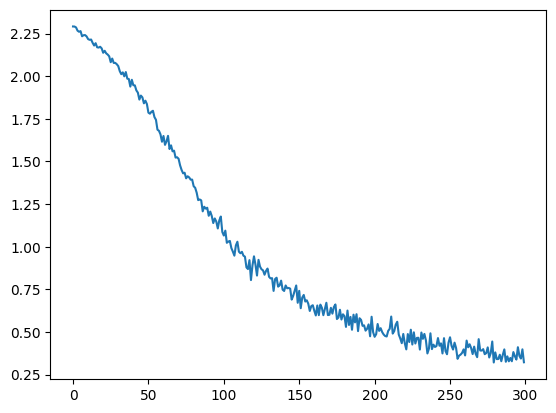

In [16]:
#lr->learning rate
#it->iterations
#bs->batch size for gradient descent
#n->neurons per layer [784,...hidden layer neurons...,10]
lr=0.001
it=100
bs=300
n=[784,200,100,10]
w,b=model(xtr,ytr,lr,it,bs,n)

In [17]:
ytp=predict(xtr,w,b)
print("Training accuracy: ",accuracy_score(np.argmax(ytr,axis=0),ytp)*100,"%")
yp=predict(xt,w,b)
print("Test accuracy: ",accuracy_score(np.argmax(yt,axis=0),yp)*100,"%")

Training accuracy:  92.1921921921922 %
Test accuracy:  83.3810888252149 %


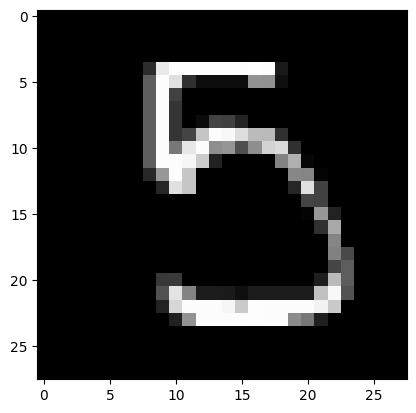

PREDICTED :  5


In [21]:
k=np.random.randint(0,xt.shape[1])
plt.imshow(xt[:,k].reshape((28,28)),cmap='grey')
plt.show()
print("PREDICTED : ",yp[k])